In [24]:
from pycocotools.coco import COCO

coco = COCO('C:/Users/aryan/Desktop/annotations/instances_train2014.json')
categories = coco.loadCats(coco.getCatIds())
names=[category['name'] for category in categories]

loading annotations into memory...
Done (t=36.70s)
creating index...
index created!
person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


In [25]:
_ = [print(name) for name in (names)]

person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


In [117]:
categoryID = coco.getCatIds(catNms=['motorcycle'])
imageIDs = coco.getImgIds(catIds=categoryID )
images = coco.loadImgs(imageIDs)

print(categoryID)
print("Total images : ", len(imageIDs))

print(images[0].keys())
print(images[0])
print('First image ID : ', images[0]['id'])
_ = [print(image['coco_url']) for image in images[:1]]

[4]
Total images :  2442
dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
{'license': 3, 'file_name': 'COCO_train2014_000000008193.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000008193.jpg', 'height': 449, 'width': 640, 'date_captured': '2013-11-15 17:17:30', 'flickr_url': 'http://farm9.staticflickr.com/8232/8507998607_4c7b563508_z.jpg', 'id': 8193}
First image ID :  8193
http://images.cocodataset.org/train2014/COCO_train2014_000000008193.jpg


In [125]:
from urllib.request import urlopen
url = 'http://images.cocodataset.org/train2014/COCO_train2014_000000008193.jpg'
respHtml = urlopen(url).read()
filename = 'C:/Users/aryan/Desktop/downloads/test0.jpg'
binfile = open(filename, "wb")
binfile.write(respHtml)
binfile.close()

In [176]:
from pycocotools.coco import COCO
coco = COCO('C:/Users/aryan/Desktop/annotations/instances_train2014.json')

import os
import urllib.request as request
from urllib.request import urlopen
import pandas as pd

testSize = 200
trainDF = pd.DataFrame(columns=['filename', 'width', 'height', 'class','xmin','ymin','xmax','ymax'])
testDF = pd.DataFrame(columns=['filename', 'width', 'height', 'class','xmin','ymin','xmax','ymax'])

categories = ['person','bicycle','motorcycle','car','truck','bus','cow','dog']

for category in categories[:]:
    count = 1
    categoryID = coco.getCatIds(catNms=[category])
    imageIDs = coco.getImgIds(catIds=categoryID )
    images = coco.loadImgs(imageIDs)
    imagesLen = len(images)
    
    for i,image in enumerate(images[:imagesLen]):
        imageID = str(image['id'])

        label = 'test' if (imagesLen-count) < testSize else 'train'
        request.urlretrieve(image['coco_url'], f'C:/Users/aryan/Desktop/objectDetection/images/{label}/'+f'{imageID}.jpg')
                
        annotationsID = coco.getAnnIds(imgIds=image['id'], catIds=categoryID)
        annotations = coco.loadAnns(annotationsID)
            
        print(f'{count}. INFO => Category - {category} | Image ID - {imageID} | #Annotations = {len(annotations)} | Label = {label} | Completion = {i+1}/{len(images)}.')
            
        for a in annotations:
            data = {
                'filename' : imageID+'.jpg',
                'width' : image['width'],
                'height' : image['height'],
                'class' : category,
                'xmin' : int(a['bbox'][0]),
                'ymin' : int(a['bbox'][1]),
                'xmax' : int(abs(int(a['bbox'][0])+int(a['bbox'][2]))),
                'ymax' : int(abs(int(a['bbox'][1])+int(a['bbox'][3])))
            }
            if (imagesLen-count) < testSize:
                testDF = testDF.append(data, ignore_index=True)
            else:
                trainDF = trainDF.append(data, ignore_index=True)
        count+=1


testDF.to_csv('C:/Users/aryan/Desktop/objectDetection/data/test_labels.csv', index=False)
trainDF.to_csv('C:/Users/aryan/Desktop/objectDetection/data/train_labels.csv', index=False)

loading annotations into memory...
Done (t=86.40s)
creating index...
index created!
1. INFO => Category - cow | Image ID - 213010 | #Annotations = 1 | Label = train | Completion = 1/1389.
2. INFO => Category - cow | Image ID - 352276 | #Annotations = 1 | Label = train | Completion = 2/1389.
3. INFO => Category - cow | Image ID - 368661 | #Annotations = 15 | Label = train | Completion = 3/1389.
4. INFO => Category - cow | Image ID - 385050 | #Annotations = 11 | Label = train | Completion = 4/1389.
5. INFO => Category - cow | Image ID - 180253 | #Annotations = 1 | Label = train | Completion = 5/1389.
6. INFO => Category - cow | Image ID - 114718 | #Annotations = 1 | Label = train | Completion = 6/1389.
7. INFO => Category - cow | Image ID - 417825 | #Annotations = 13 | Label = train | Completion = 7/1389.
8. INFO => Category - cow | Image ID - 90148 | #Annotations = 14 | Label = train | Completion = 8/1389.
9. INFO => Category - cow | Image ID - 229419 | #Annotations = 3 | Label = train 

78. INFO => Category - cow | Image ID - 57749 | #Annotations = 3 | Label = train | Completion = 78/1389.
79. INFO => Category - cow | Image ID - 311709 | #Annotations = 4 | Label = train | Completion = 79/1389.
80. INFO => Category - cow | Image ID - 344482 | #Annotations = 8 | Label = train | Completion = 80/1389.
81. INFO => Category - cow | Image ID - 131490 | #Annotations = 8 | Label = train | Completion = 81/1389.
82. INFO => Category - cow | Image ID - 106917 | #Annotations = 7 | Label = train | Completion = 82/1389.
83. INFO => Category - cow | Image ID - 385448 | #Annotations = 1 | Label = train | Completion = 83/1389.
84. INFO => Category - cow | Image ID - 532912 | #Annotations = 3 | Label = train | Completion = 84/1389.
85. INFO => Category - cow | Image ID - 262579 | #Annotations = 2 | Label = train | Completion = 85/1389.
86. INFO => Category - cow | Image ID - 393686 | #Annotations = 3 | Label = train | Completion = 86/1389.
87. INFO => Category - cow | Image ID - 147930 

155. INFO => Category - cow | Image ID - 459644 | #Annotations = 1 | Label = train | Completion = 155/1389.
156. INFO => Category - cow | Image ID - 254856 | #Annotations = 2 | Label = train | Completion = 156/1389.
157. INFO => Category - cow | Image ID - 66441 | #Annotations = 1 | Label = train | Completion = 157/1389.
158. INFO => Category - cow | Image ID - 549773 | #Annotations = 1 | Label = train | Completion = 158/1389.
159. INFO => Category - cow | Image ID - 181135 | #Annotations = 2 | Label = train | Completion = 159/1389.
160. INFO => Category - cow | Image ID - 312220 | #Annotations = 11 | Label = train | Completion = 160/1389.
161. INFO => Category - cow | Image ID - 451490 | #Annotations = 3 | Label = train | Completion = 161/1389.
162. INFO => Category - cow | Image ID - 17324 | #Annotations = 2 | Label = train | Completion = 162/1389.
163. INFO => Category - cow | Image ID - 369580 | #Annotations = 1 | Label = train | Completion = 163/1389.
164. INFO => Category - cow |

231. INFO => Category - cow | Image ID - 255210 | #Annotations = 2 | Label = train | Completion = 231/1389.
232. INFO => Category - cow | Image ID - 435451 | #Annotations = 4 | Label = train | Completion = 232/1389.
233. INFO => Category - cow | Image ID - 140543 | #Annotations = 10 | Label = train | Completion = 233/1389.
234. INFO => Category - cow | Image ID - 345345 | #Annotations = 1 | Label = train | Completion = 234/1389.
235. INFO => Category - cow | Image ID - 25858 | #Annotations = 14 | Label = train | Completion = 235/1389.
236. INFO => Category - cow | Image ID - 58640 | #Annotations = 4 | Label = train | Completion = 236/1389.
237. INFO => Category - cow | Image ID - 525589 | #Annotations = 1 | Label = train | Completion = 237/1389.
238. INFO => Category - cow | Image ID - 230680 | #Annotations = 5 | Label = train | Completion = 238/1389.
239. INFO => Category - cow | Image ID - 247071 | #Annotations = 3 | Label = train | Completion = 239/1389.
240. INFO => Category - cow 

307. INFO => Category - cow | Image ID - 427729 | #Annotations = 3 | Label = train | Completion = 307/1389.
308. INFO => Category - cow | Image ID - 34525 | #Annotations = 7 | Label = train | Completion = 308/1389.
309. INFO => Category - cow | Image ID - 247525 | #Annotations = 1 | Label = train | Completion = 309/1389.
310. INFO => Category - cow | Image ID - 468713 | #Annotations = 4 | Label = train | Completion = 310/1389.
311. INFO => Category - cow | Image ID - 345835 | #Annotations = 4 | Label = train | Completion = 311/1389.
312. INFO => Category - cow | Image ID - 214764 | #Annotations = 2 | Label = train | Completion = 312/1389.
313. INFO => Category - cow | Image ID - 181997 | #Annotations = 1 | Label = train | Completion = 313/1389.
314. INFO => Category - cow | Image ID - 116464 | #Annotations = 1 | Label = train | Completion = 314/1389.
315. INFO => Category - cow | Image ID - 165621 | #Annotations = 1 | Label = train | Completion = 315/1389.
316. INFO => Category - cow |

383. INFO => Category - cow | Image ID - 444483 | #Annotations = 4 | Label = train | Completion = 383/1389.
384. INFO => Category - cow | Image ID - 133200 | #Annotations = 14 | Label = train | Completion = 384/1389.
385. INFO => Category - cow | Image ID - 26719 | #Annotations = 1 | Label = train | Completion = 385/1389.
386. INFO => Category - cow | Image ID - 67680 | #Annotations = 1 | Label = train | Completion = 386/1389.
387. INFO => Category - cow | Image ID - 157792 | #Annotations = 11 | Label = train | Completion = 387/1389.
388. INFO => Category - cow | Image ID - 354410 | #Annotations = 1 | Label = train | Completion = 388/1389.
389. INFO => Category - cow | Image ID - 567403 | #Annotations = 8 | Label = train | Completion = 389/1389.
390. INFO => Category - cow | Image ID - 75883 | #Annotations = 14 | Label = train | Completion = 390/1389.
391. INFO => Category - cow | Image ID - 231532 | #Annotations = 12 | Label = train | Completion = 391/1389.
392. INFO => Category - cow

459. INFO => Category - cow | Image ID - 35299 | #Annotations = 14 | Label = train | Completion = 459/1389.
460. INFO => Category - cow | Image ID - 149993 | #Annotations = 6 | Label = train | Completion = 460/1389.
461. INFO => Category - cow | Image ID - 297465 | #Annotations = 11 | Label = train | Completion = 461/1389.
462. INFO => Category - cow | Image ID - 289275 | #Annotations = 3 | Label = train | Completion = 462/1389.
463. INFO => Category - cow | Image ID - 281091 | #Annotations = 4 | Label = train | Completion = 463/1389.
464. INFO => Category - cow | Image ID - 84499 | #Annotations = 1 | Label = train | Completion = 464/1389.
465. INFO => Category - cow | Image ID - 264735 | #Annotations = 10 | Label = train | Completion = 465/1389.
466. INFO => Category - cow | Image ID - 150048 | #Annotations = 5 | Label = train | Completion = 466/1389.
467. INFO => Category - cow | Image ID - 281127 | #Annotations = 13 | Label = train | Completion = 467/1389.
468. INFO => Category - co

535. INFO => Category - cow | Image ID - 429015 | #Annotations = 9 | Label = train | Completion = 535/1389.
536. INFO => Category - cow | Image ID - 84956 | #Annotations = 1 | Label = train | Completion = 536/1389.
537. INFO => Category - cow | Image ID - 183268 | #Annotations = 6 | Label = train | Completion = 537/1389.
538. INFO => Category - cow | Image ID - 150500 | #Annotations = 1 | Label = train | Completion = 538/1389.
539. INFO => Category - cow | Image ID - 494579 | #Annotations = 6 | Label = train | Completion = 539/1389.
540. INFO => Category - cow | Image ID - 420862 | #Annotations = 4 | Label = train | Completion = 540/1389.
541. INFO => Category - cow | Image ID - 199683 | #Annotations = 3 | Label = train | Completion = 541/1389.
542. INFO => Category - cow | Image ID - 175122 | #Annotations = 3 | Label = train | Completion = 542/1389.
543. INFO => Category - cow | Image ID - 429092 | #Annotations = 1 | Label = train | Completion = 543/1389.
544. INFO => Category - cow |

611. INFO => Category - cow | Image ID - 93621 | #Annotations = 12 | Label = train | Completion = 611/1389.
612. INFO => Category - cow | Image ID - 224695 | #Annotations = 2 | Label = train | Completion = 612/1389.
613. INFO => Category - cow | Image ID - 331201 | #Annotations = 1 | Label = train | Completion = 613/1389.
614. INFO => Category - cow | Image ID - 372163 | #Annotations = 1 | Label = train | Completion = 614/1389.
615. INFO => Category - cow | Image ID - 429509 | #Annotations = 1 | Label = train | Completion = 615/1389.
616. INFO => Category - cow | Image ID - 208327 | #Annotations = 3 | Label = train | Completion = 616/1389.
617. INFO => Category - cow | Image ID - 191947 | #Annotations = 2 | Label = train | Completion = 617/1389.
618. INFO => Category - cow | Image ID - 560587 | #Annotations = 5 | Label = train | Completion = 618/1389.
619. INFO => Category - cow | Image ID - 126415 | #Annotations = 2 | Label = train | Completion = 619/1389.
620. INFO => Category - cow 

687. INFO => Category - cow | Image ID - 511874 | #Annotations = 5 | Label = train | Completion = 687/1389.
688. INFO => Category - cow | Image ID - 69510 | #Annotations = 5 | Label = train | Completion = 688/1389.
689. INFO => Category - cow | Image ID - 315273 | #Annotations = 6 | Label = train | Completion = 689/1389.
690. INFO => Category - cow | Image ID - 438154 | #Annotations = 1 | Label = train | Completion = 690/1389.
691. INFO => Category - cow | Image ID - 372634 | #Annotations = 1 | Label = train | Completion = 691/1389.
692. INFO => Category - cow | Image ID - 487340 | #Annotations = 13 | Label = train | Completion = 692/1389.
693. INFO => Category - cow | Image ID - 438191 | #Annotations = 8 | Label = train | Completion = 693/1389.
694. INFO => Category - cow | Image ID - 536496 | #Annotations = 1 | Label = train | Completion = 694/1389.
695. INFO => Category - cow | Image ID - 69572 | #Annotations = 1 | Label = train | Completion = 695/1389.
696. INFO => Category - cow |

763. INFO => Category - cow | Image ID - 176435 | #Annotations = 2 | Label = train | Completion = 763/1389.
764. INFO => Category - cow | Image ID - 471352 | #Annotations = 3 | Label = train | Completion = 764/1389.
765. INFO => Category - cow | Image ID - 135480 | #Annotations = 2 | Label = train | Completion = 765/1389.
766. INFO => Category - cow | Image ID - 28988 | #Annotations = 3 | Label = train | Completion = 766/1389.
767. INFO => Category - cow | Image ID - 192843 | #Annotations = 2 | Label = train | Completion = 767/1389.
768. INFO => Category - cow | Image ID - 282957 | #Annotations = 1 | Label = train | Completion = 768/1389.
769. INFO => Category - cow | Image ID - 414046 | #Annotations = 1 | Label = train | Completion = 769/1389.
770. INFO => Category - cow | Image ID - 446819 | #Annotations = 1 | Label = train | Completion = 770/1389.
771. INFO => Category - cow | Image ID - 201064 | #Annotations = 1 | Label = train | Completion = 771/1389.
772. INFO => Category - cow |

839. INFO => Category - cow | Image ID - 537343 | #Annotations = 1 | Label = train | Completion = 839/1389.
840. INFO => Category - cow | Image ID - 439050 | #Annotations = 2 | Label = train | Completion = 840/1389.
841. INFO => Category - cow | Image ID - 480012 | #Annotations = 2 | Label = train | Completion = 841/1389.
842. INFO => Category - cow | Image ID - 455443 | #Annotations = 9 | Label = train | Completion = 842/1389.
843. INFO => Category - cow | Image ID - 430872 | #Annotations = 1 | Label = train | Completion = 843/1389.
844. INFO => Category - cow | Image ID - 480052 | #Annotations = 1 | Label = train | Completion = 844/1389.
845. INFO => Category - cow | Image ID - 496439 | #Annotations = 2 | Label = train | Completion = 845/1389.
846. INFO => Category - cow | Image ID - 21316 | #Annotations = 2 | Label = train | Completion = 846/1389.
847. INFO => Category - cow | Image ID - 234316 | #Annotations = 4 | Label = train | Completion = 847/1389.
848. INFO => Category - cow |

915. INFO => Category - cow | Image ID - 546031 | #Annotations = 4 | Label = train | Completion = 915/1389.
916. INFO => Category - cow | Image ID - 406770 | #Annotations = 1 | Label = train | Completion = 916/1389.
917. INFO => Category - cow | Image ID - 308468 | #Annotations = 2 | Label = train | Completion = 917/1389.
918. INFO => Category - cow | Image ID - 13556 | #Annotations = 4 | Label = train | Completion = 918/1389.
919. INFO => Category - cow | Image ID - 292088 | #Annotations = 1 | Label = train | Completion = 919/1389.
920. INFO => Category - cow | Image ID - 169217 | #Annotations = 3 | Label = train | Completion = 920/1389.
921. INFO => Category - cow | Image ID - 414982 | #Annotations = 2 | Label = train | Completion = 921/1389.
922. INFO => Category - cow | Image ID - 275723 | #Annotations = 3 | Label = train | Completion = 922/1389.
923. INFO => Category - cow | Image ID - 316699 | #Annotations = 11 | Label = train | Completion = 923/1389.
924. INFO => Category - cow 

991. INFO => Category - cow | Image ID - 22223 | #Annotations = 4 | Label = train | Completion = 991/1389.
992. INFO => Category - cow | Image ID - 161499 | #Annotations = 5 | Label = train | Completion = 992/1389.
993. INFO => Category - cow | Image ID - 562916 | #Annotations = 1 | Label = train | Completion = 993/1389.
994. INFO => Category - cow | Image ID - 349925 | #Annotations = 1 | Label = train | Completion = 994/1389.
995. INFO => Category - cow | Image ID - 333550 | #Annotations = 3 | Label = train | Completion = 995/1389.
996. INFO => Category - cow | Image ID - 497393 | #Annotations = 1 | Label = train | Completion = 996/1389.
997. INFO => Category - cow | Image ID - 136951 | #Annotations = 14 | Label = train | Completion = 997/1389.
998. INFO => Category - cow | Image ID - 128763 | #Annotations = 3 | Label = train | Completion = 998/1389.
999. INFO => Category - cow | Image ID - 448251 | #Annotations = 1 | Label = train | Completion = 999/1389.
1000. INFO => Category - cow

1066. INFO => Category - cow | Image ID - 334046 | #Annotations = 1 | Label = train | Completion = 1066/1389.
1067. INFO => Category - cow | Image ID - 424160 | #Annotations = 4 | Label = train | Completion = 1067/1389.
1068. INFO => Category - cow | Image ID - 202991 | #Annotations = 14 | Label = train | Completion = 1068/1389.
1069. INFO => Category - cow | Image ID - 547055 | #Annotations = 2 | Label = train | Completion = 1069/1389.
1070. INFO => Category - cow | Image ID - 39155 | #Annotations = 2 | Label = train | Completion = 1070/1389.
1071. INFO => Category - cow | Image ID - 227576 | #Annotations = 8 | Label = train | Completion = 1071/1389.
1072. INFO => Category - cow | Image ID - 137483 | #Annotations = 1 | Label = train | Completion = 1072/1389.
1073. INFO => Category - cow | Image ID - 153870 | #Annotations = 1 | Label = train | Completion = 1073/1389.
1074. INFO => Category - cow | Image ID - 456979 | #Annotations = 3 | Label = train | Completion = 1074/1389.
1075. INFO

1141. INFO => Category - cow | Image ID - 137806 | #Annotations = 3 | Label = train | Completion = 1141/1389.
1142. INFO => Category - cow | Image ID - 457305 | #Annotations = 1 | Label = train | Completion = 1142/1389.
1143. INFO => Category - cow | Image ID - 219752 | #Annotations = 1 | Label = train | Completion = 1143/1389.
1144. INFO => Category - cow | Image ID - 178801 | #Annotations = 1 | Label = train | Completion = 1144/1389.
1145. INFO => Category - cow | Image ID - 121461 | #Annotations = 14 | Label = train | Completion = 1145/1389.
1146. INFO => Category - cow | Image ID - 309881 | #Annotations = 5 | Label = train | Completion = 1146/1389.
1147. INFO => Category - cow | Image ID - 47743 | #Annotations = 5 | Label = train | Completion = 1147/1389.
1148. INFO => Category - cow | Image ID - 457344 | #Annotations = 1 | Label = train | Completion = 1148/1389.
1149. INFO => Category - cow | Image ID - 39553 | #Annotations = 1 | Label = train | Completion = 1149/1389.
1150. INFO 

1216. INFO => Category - cow | Image ID - 285755 | #Annotations = 6 | Label = test | Completion = 1216/1389.
1217. INFO => Category - cow | Image ID - 375869 | #Annotations = 2 | Label = test | Completion = 1217/1389.
1218. INFO => Category - cow | Image ID - 269381 | #Annotations = 1 | Label = test | Completion = 1218/1389.
1219. INFO => Category - cow | Image ID - 48201 | #Annotations = 14 | Label = test | Completion = 1219/1389.
1220. INFO => Category - cow | Image ID - 15438 | #Annotations = 1 | Label = test | Completion = 1220/1389.
1221. INFO => Category - cow | Image ID - 80980 | #Annotations = 6 | Label = test | Completion = 1221/1389.
1222. INFO => Category - cow | Image ID - 236632 | #Annotations = 1 | Label = test | Completion = 1222/1389.
1223. INFO => Category - cow | Image ID - 203867 | #Annotations = 1 | Label = test | Completion = 1223/1389.
1224. INFO => Category - cow | Image ID - 253030 | #Annotations = 5 | Label = test | Completion = 1224/1389.
1225. INFO => Categor

1292. INFO => Category - cow | Image ID - 7621 | #Annotations = 3 | Label = test | Completion = 1292/1389.
1293. INFO => Category - cow | Image ID - 499138 | #Annotations = 2 | Label = test | Completion = 1293/1389.
1294. INFO => Category - cow | Image ID - 237000 | #Annotations = 6 | Label = test | Completion = 1294/1389.
1295. INFO => Category - cow | Image ID - 15823 | #Annotations = 1 | Label = test | Completion = 1295/1389.
1296. INFO => Category - cow | Image ID - 564687 | #Annotations = 7 | Label = test | Completion = 1296/1389.
1297. INFO => Category - cow | Image ID - 556503 | #Annotations = 2 | Label = test | Completion = 1297/1389.
1298. INFO => Category - cow | Image ID - 392674 | #Annotations = 9 | Label = test | Completion = 1298/1389.
1299. INFO => Category - cow | Image ID - 73187 | #Annotations = 1 | Label = test | Completion = 1299/1389.
1300. INFO => Category - cow | Image ID - 318955 | #Annotations = 2 | Label = test | Completion = 1300/1389.
1301. INFO => Category 

1368. INFO => Category - cow | Image ID - 303012 | #Annotations = 2 | Label = test | Completion = 1368/1389.
1369. INFO => Category - cow | Image ID - 393127 | #Annotations = 1 | Label = test | Completion = 1369/1389.
1370. INFO => Category - cow | Image ID - 303020 | #Annotations = 1 | Label = test | Completion = 1370/1389.
1371. INFO => Category - cow | Image ID - 278450 | #Annotations = 2 | Label = test | Completion = 1371/1389.
1372. INFO => Category - cow | Image ID - 360370 | #Annotations = 4 | Label = test | Completion = 1372/1389.
1373. INFO => Category - cow | Image ID - 343992 | #Annotations = 1 | Label = test | Completion = 1373/1389.
1374. INFO => Category - cow | Image ID - 32700 | #Annotations = 3 | Label = test | Completion = 1374/1389.
1375. INFO => Category - cow | Image ID - 286656 | #Annotations = 1 | Label = test | Completion = 1375/1389.
1376. INFO => Category - cow | Image ID - 90051 | #Annotations = 5 | Label = test | Completion = 1376/1389.
1377. INFO => Categor

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-

In [2]:
# This is needed to display the images.
%matplotlib inline

In [6]:
from utils import label_map_util
from utils import visualization_utils as vis_util

MODEL_NAME = 'modelGraph'
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

PATH_TO_LABELS = os.path.join('training', 'label_map.pbtxt')

In [7]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [8]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [9]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [30]:
import numpy as np

import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

from utils import label_map_util
from utils import visualization_utils as vis_util

import cv2
import skvideo
import skvideo.io
from skvideo.io import vread
from skvideo.io import vwrite

PATH_TO_CKPT = './preTrainedModelx/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('training', 'label_map.pbtxt')

NUM_CLASSES = 1
sys.path.append("..")

frames2 = []

def detect_in_video():
    
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
            
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    
    label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
    categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    
    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:
            
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            
            videogen = skvideo.io.vreader('myVideo.mkv')
            frames = list(videogen)
                
            for i,frame in enumerate(frames[:500]):
                
                if i%100 ==0:
                    print(f'{i}/{len(frames)}')
                
                image_np_expanded = np.expand_dims(frame, axis=0)

                (boxes, scores, classes, num) = sess.run(
                    [detection_boxes, detection_scores,
                        detection_classes, num_detections],
                    feed_dict={image_tensor: image_np_expanded})

                vis_util.visualize_boxes_and_labels_on_image_array(
                    frame,
                    np.squeeze(boxes),
                    np.squeeze(classes).astype(np.int32),
                    np.squeeze(scores),
                    category_index,
                    use_normalized_coordinates=True,
                    line_thickness=2,
                    min_score_thresh=.20)

                frames2.append(frame)

                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

            skvideo.io.vwrite("outputVideoX.mkv", frames2)
            print('Complete!')

detect_in_video()

0/7079
100/7079
200/7079
300/7079
400/7079
Complete!


In [8]:
from tensorflow.graph_util.import_graph_def as graph_def
for node in graph_def.node:
    print(node.name)

SyntaxError: invalid syntax (<ipython-input-8-7e2dc3e8b5d2>, line 1)

In [49]:
import skvideo.io
import skvideo.datasets
import matplotlib.pyplot as plt
import numpy as np

videogen = skvideo.io.vreader('myVideo.mkv')
print(type(videogen))
frames = list(videogen)[500:1500]
skvideo.io.vwrite("temp.mkv", frames)


<class 'generator'>


In [ ]:
import skvideo.io
import skvideo.datasets

inputparameters = {}
outputparameters = {}
reader = skvideo.io.FFmpegReader(skvideo.datasets.bigbuckbunny(),
                inputdict=inputparameters,
                outputdict=outputparameters)

accumulation = 0
for frame in reader.nextFrame():
        accumulation += np.sum(frame)

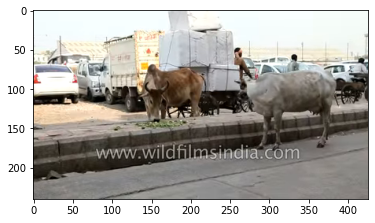

In [41]:
import numpy as np
import matplotlib.pyplot as plt

videogen = skvideo.io.vreader('myVideo.mkv')
frames = list(videogen)

for frame in frames[:1000]:
    plt.imshow(frame)

In [9]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('./preTrainedModel/saved_model/')
tflite_model = converter.convert()
open("./preTrainedModel/saved_model/converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: inputs
INFO:tensorflow: tensor name: image_tensor:0, shape: (-1, -1, -1, 3), type: DT_UINT8
INFO:tensorflow:output tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_classes
INFO:tensorflow: tensor name: detection_classes:0, shape: (-1, 100), type: DT_FLOAT
INFO:tensorflow:Tensor's key in saved_model's tensor_map: num_detections
INFO:tensorflow: tensor name: num_detections:0, shape: (-1), type: DT_FLOAT
INFO:tensorflow:Tensor's key in saved_model's tensor_map: detection_boxes
INFO:tensorflow: tensor name: detection_boxes:0, shape: (-1, 100, 4), type: DT_FLOAT
INFO:tensor

ValueError: None is only supported in the 1st dimension. Tensor 'image_tensor' has invalid shape '[None, None, None, 3]'.

In [11]:
import os
print(os.getcwd())

C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\code\Object Detection\models\research\object_detection


In [16]:
!python export_tflite_ssd_graph.py \
    --pipeline_config_path=training/ssd_mobilenet_v2_quantized_300x300_coco.config \
    --trained_checkpoint_prefix=training/model.ckpt-6571 \
    --output_directory=tf-Lite \
    --add_postprocessing_op=true

C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-

In [19]:
# !tflite_convert \
#     --graph_def_file=tf-Lite/tflite_graph.pb \
#     --output_file=tf-Lite/detect.tflite \
#     --output_format=TFLITE \
#     --input_shapes=1,300,300,3 \
#     --input_arrays=image_tensor \
#     --output_arrays=TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3  \
#     --allow_custom_ops
            
!tflite_convert \
    --graph_def_file=tf-Lite/tflite_graph.pb \
    --output_file=tf-Lite/detect.tflite \
    --output_format=TFLITE \
    --input_shapes=1,300,300,3 \
    --input_arrays=normalized_input_image_tensor \
    --output_arrays=TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3  \
    --inference_type=QUANTIZED_UINT8 \
    --mean_values=128 \
    --std_dev_values=127 \
    --change_concat_input_ranges=false \
    --allow_custom_ops

C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\lib\site-

In [24]:
import tensorflow as tf
frozen='./preTrainedModel/frozen_inference_graph.pb'
gf = tf.GraphDef()
gf.ParseFromString(open(frozen,'rb').read())
[n.name + '=>' +  n.op for n in gf.node if n.op in ( 'Softmax','Placeholder')]    
[n.name + '=>' +  n.op for n in gf.node if n.op in ( 'Softmax','Mul')]

['Preprocessor/mul=>Mul',
 'MultipleGridAnchorGenerator/mul=>Mul',
 'MultipleGridAnchorGenerator/mul_1=>Mul',
 'MultipleGridAnchorGenerator/mul_2=>Mul',
 'MultipleGridAnchorGenerator/mul_3=>Mul',
 'MultipleGridAnchorGenerator/mul_4=>Mul',
 'MultipleGridAnchorGenerator/mul_5=>Mul',
 'MultipleGridAnchorGenerator/mul_6=>Mul',
 'MultipleGridAnchorGenerator/mul_7=>Mul',
 'MultipleGridAnchorGenerator/mul_8=>Mul',
 'MultipleGridAnchorGenerator/mul_9=>Mul',
 'MultipleGridAnchorGenerator/mul_10=>Mul',
 'MultipleGridAnchorGenerator/mul_11=>Mul',
 'MultipleGridAnchorGenerator/mul_12=>Mul',
 'MultipleGridAnchorGenerator/mul_13=>Mul',
 'MultipleGridAnchorGenerator/mul_14=>Mul',
 'MultipleGridAnchorGenerator/mul_15=>Mul',
 'MultipleGridAnchorGenerator/mul_16=>Mul',
 'MultipleGridAnchorGenerator/mul_17=>Mul',
 'MultipleGridAnchorGenerator/mul_18=>Mul',
 'MultipleGridAnchorGenerator/mul_19=>Mul',
 'MultipleGridAnchorGenerator/mul_20=>Mul',
 'MultipleGridAnchorGenerator/mul_22=>Mul',
 'MultipleGridAnch

In [ ]:
!bazel run //tensorflow/lite/tools:visualize \
  "<directory with the TensorFlow examples repository>/lite/examples/object_detection/android/app/src/main/assets/detect.tflite" \
  detect.html

In [34]:
import tensorflow as tf
gf = tf.GraphDef()   
m_file = open('preTrainedModelx/frozen_inference_graph.pb','rb')
gf.ParseFromString(m_file.read())

with open('somefilex.txt', 'a') as the_file:
    for n in gf.node:
        the_file.write(n.name+'\n')

file = open('somefile.txt','r')
data = file.readlines()
print("output name = ")
print(data[len(data)-1])

print("Input name = ")
file.seek (0)
print(file.readline())

output name = 
num_detections

Input name = 
Const



In [1]:
!bazel run -c opt tensorflow/lite/toco:toco \
    --input_file=tf-Lite/tflite_graph.pb \
    --output_file=tf-Lite/detectx.tflite \
    --input_shapes=1,300,300,3 \
    --input_arrays=normalized_input_image_tensor \
    --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3'  \
    --inference_type=FLOAT \
    --mean_values=128 \
    --std_values=128 \
    --change_concat_input_ranges=false \
    --allow_custom_ops

'bazel' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
import os
print(os.getcwd())
!tensorboard --logdir=./training

C:\Users\aryan\anaconda3\envs\tf-gpu-v1.14\code\Object Detection\models\research\object_detection
^C


In [104]:
import urllib.request as requests
import numpy as np
import pandas as pd

r = requests.get('https://coderbyte.com/api/challenges/json/age-counting')
print(len(r.json()['data']))

# print(r.json()["data"])

AttributeError: module 'urllib.request' has no attribute 'get'

In [69]:
'[aryan]'.

'aryan'